### **New York City Airbnb**

[Sumber data NYC Airbnb](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Airbnb adalah sebuah platform online yang kebanyakan menawarkan servis sewa akomodasi, di mana interaksi yang terjadi adalah antara tuan rumah *(host)* dan calon penyewa, sedangkan Airbnb sendiri hanya sebagai pihak ketiga seperti marketplace pada umumnya. Airbnb sudah beroperasi sejak 2008 dan wilayah operasinya sudah tersebar di 191+ negara. Melansir dari halaman web [New York City planning](https://www1.nyc.gov/site/planning/planning-level/nyc-population/population-facts.page), kota New York sebagai kota yang memiliki populasi terbanyak di Amerika Serikat, pun tentu turut andil dalam pertumbuhan bisnis Airbnb, di mana banyak turis yang melancong ke kota New York dan tentunya membutuhkan penginapan.

Untuk menjadi tuan rumah Airbnb, caranya sangat mudah, hanya dengan membuat akun pada halaman web Airbnb dan memilih opsi sebagai 'host'. Lalu, tuan rumah bisa mulai memasukkan daftar propertinya beserta harga sewanya. Akan tetapi, model bisnis Airbnb membebaskan tuan rumah untuk menentukan harga sewa propertinya, yang mana hal ini tentu saja cukup menyulitkan bagi tuan rumah. Jika harganya terlalu mahal dibanding properti-properti lain dengan fitur sejenis di sekitar areanya, tentu akan sedikit yang akan menyewa propertinya. Sebaliknya, jika terlalu murah, tentu tuan rumah tidak akan mendapatkan profit yang sepadan. Banyak faktor yang memengaruhi nilai dari suatu properti. Tentunya hal tersebut perlu dipahami juga oleh sang tuan rumah karena berhubungan dengan profit yang bisa didapatkan.

**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan seperti Airbnb adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial bagi pemilik properti, serta dapat memberikan pengalaman positif terhadap penyewa akomodasi.

Mengingat Airbnb menawarkan kebebasan penuh kepada tuan rumah untuk menentukan harga properti mereka, dengan hanya memberikan petunjuk minimal yang memungkinkan tuan rumah membandingkan tempat serupa di lingkungan mereka untuk mendapatkan harga yang kompetitif. Tuan rumah pun dapat memasukkan harga yang lebih tinggi untuk fasilitas tambahan apa pun yang mereka anggap perlu. **Dengan bertambahnya jumlah tuan rumah yang menggunakan Airbnb, menentukan harga yang tepat untuk dapat tetap kompetitif di lingkungan sekitar tuan rumah sangatlah penting**.

**Goals**

Berdasarkan permasalahan tersebut, Airbnb tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu klien mereka (dalam hal ini tuan rumah) untuk dapat **menentukan harga sewa properti yang tepat untuk tiap properti yang baru akan mereka sewakan**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti jumlah kamar, lokasi, tipe properti dapat menambah keakuratan prediksi harga sewa, yang mana dapat mendatangkan profit bagi tuan rumah, dan juga tentunya masih terjangkau bagi penyewa.

Bagi Airbnb, prediction tool yang dapat memberikan prediksi harga secara fair tentu dapat meningkatkan jumlah host maupun listing. Dengan kata lain, semakin banyak host dan listing berarti dapat meningkatkan revenue perusahaan, dalam konteks ini didapat dari 'booking charge' baik dari hosts maupun guests.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya. 

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga sewa akomodasi yang baru masuk dalam daftar Airbnb, yang mana akan berguna untuk tuan rumah (host) dalam menentukan harga sewa listing-nya.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Dataset merupakan data listing Airbnb di kota New York pada tahun 2019.
- Setiap baris data merepresentasikan informasi terkait properti dan pemiliknya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| id | Integer | Listing ID |
| name | Object | Name of the listing |
| host_id | Integer | Host ID |
| host_name | Object | Name of the host |
| neighbourhood_group | Object | Location |
| neighbourhood | Object | Area |
| latitude | Float | Latitude coordinates |
| longitude | Float | Longitude coordinates |
| room_type | Object | Listing space type |
| price | Integer | Price in dollars |
| minimum_nights | Integer | Amount of nights minimum |
| number_of_reviews | Integer | Number of reviews |
| last_review | Object | Latest review |
| reviews_per_month | Float | Number of reviews per month |
| calculated_host_listings_count | Integer | Amount of listing per host |
| availability_365 | Integer | Number of days when listing is available for booking |

<br>

In [3]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### **Exploratory Data Analysis**

**Distribution of NYC Airbnb price**

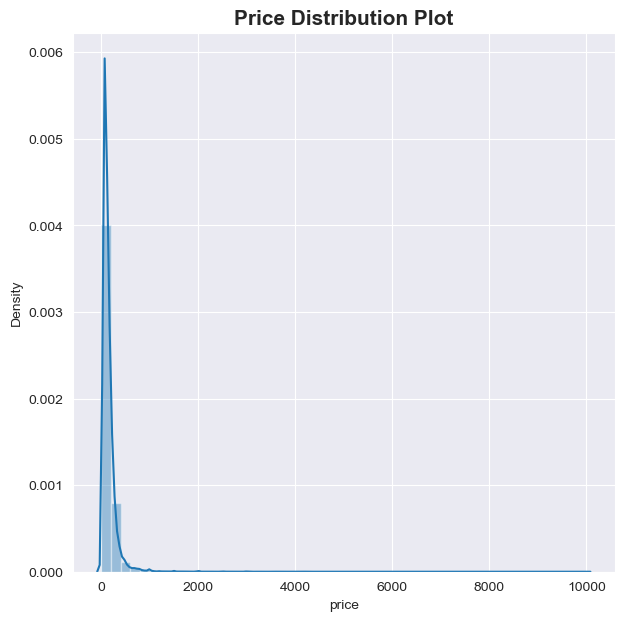

In [5]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga sewa Airbnb di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur price.

**Types of property related to price**

In [6]:
# Cek jumlah properti berdasarkan neighbourhood group dan tipenya
print(f"Jumlah properti di tiap neighbourhood group:\n{df['neighbourhood_group'].value_counts()}")
print(f"\nJumlah tiap tipe properti:\n{df['room_type'].value_counts()}")

Jumlah properti di tiap neighbourhood group:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Jumlah tiap tipe properti:
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


Kebanyakan properti berlokasi di Manhattan dan Brooklyn dengan tipe properti yang disewakan didominasi oleh private room dan entire home/apt.

In [7]:
# Grouping tipe properti berdasarkan neighbourhood group
df.groupby(['neighbourhood_group', 'room_type'])['room_type'].count()

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64

In [8]:
# Cek median price untuk tiap neighbourhood group
df_median_price = df.groupby(by=['neighbourhood_group']).agg({'price':'median'}).reset_index()
df_median_price = df_median_price.set_index('neighbourhood_group')
df_median_price = df_median_price.sort_values('price', ascending =False)
df_median_price.head()

,price
neighbourhood_group,
Manhattan,150.0
Brooklyn,90.0
Queens,75.0
Staten Island,75.0
Bronx,65.0


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.0,53.5,40.0
Brooklyn,145.0,65.0,36.0
Manhattan,191.0,90.0,69.0
Queens,120.0,60.0,37.0
Staten Island,100.0,50.0,30.0


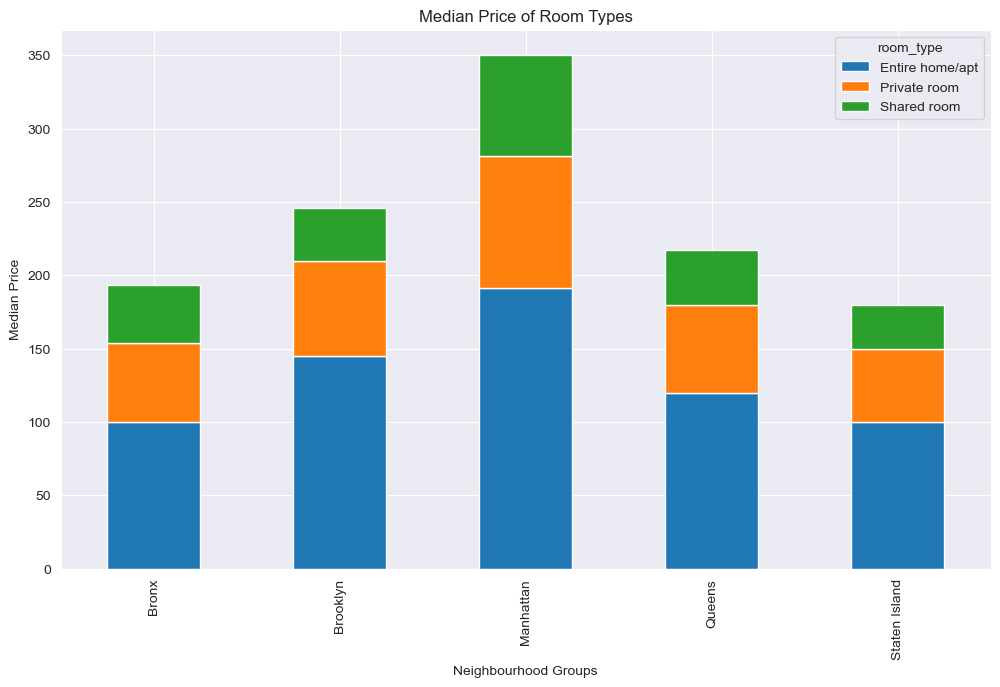

In [9]:
# Plot harga median untuk tiap tipe properti di setiap neighbourhood group
from IPython.display import display

neighbour_pivot = df.pivot_table(index='neighbourhood_group', columns='room_type', values='price', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('Neighbourhood Groups')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Room Types');

  Area Manhattan memiliki harga median tertinggi untuk tiap tipe kamar, yang mana entire home/apt harga mediannya mencapai 2 kali lipat harga private room, yaitu sekitar $200. 

  Seperti yang sudah diketahui, nilai rata-rata review tertinggi adalah Queens, tetapi ternyata median harga Airbnb di Queens bahkan jauh di bawah Manhattan yang memiliki nilai rata-rata review per bulan paling rendah.

**Location**

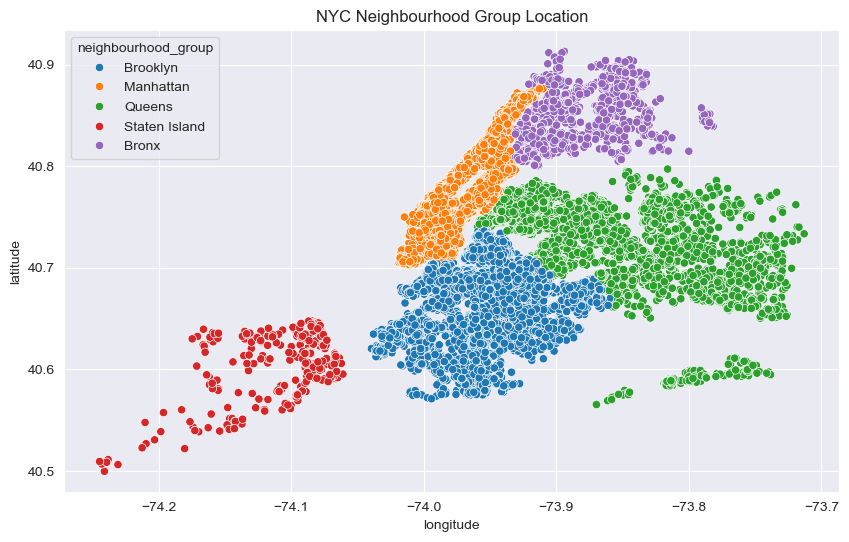

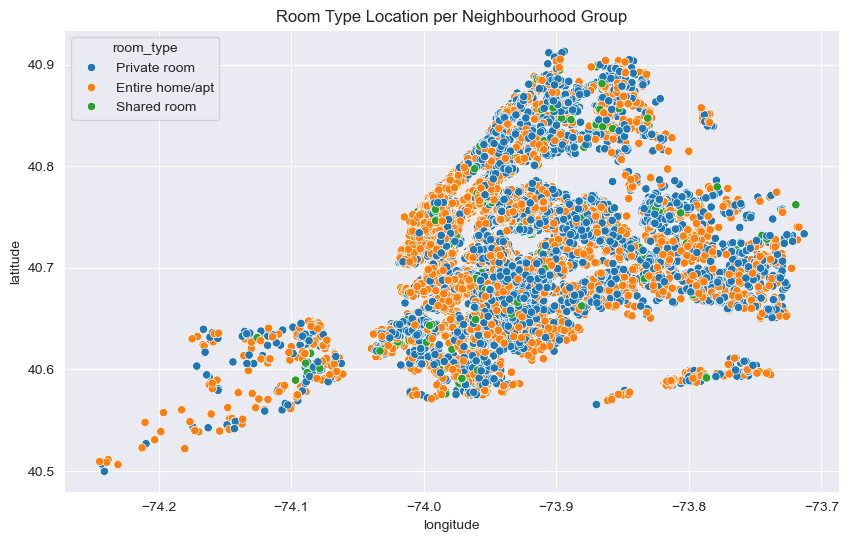

In [11]:
# Plot lokasi 'neighbourhood_group'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group']).set_title('NYC Neighbourhood Group Location')

# Plot persebaran 'room_type'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['room_type']).set_title('Room Type Location per Neighbourhood Group');

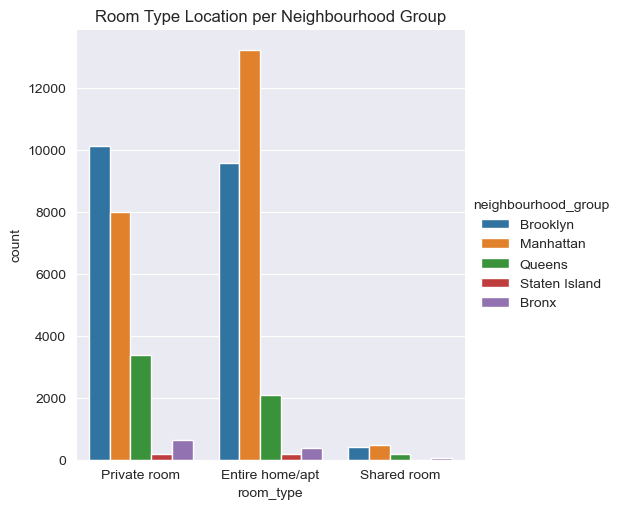

In [12]:
# Persebaran tipe kamar berdasarkan neighbourhood group
sns.catplot(x='room_type', kind='count', hue='neighbourhood_group', data=df);
plt.title('Room Type Location per Neighbourhood Group');

Mayoritas tipe properti adalah entire home/apt dan berlokasi di Manhattan, sedangkan mayoritas tipe properti private room berlokasi di Brooklyn. Hal ini dapat menjadi indikasi terkait preferensi penyewa, yang mana lebih banyak yang menyukai private room ataupun entire home/apt daripada shared room.

**Availability**

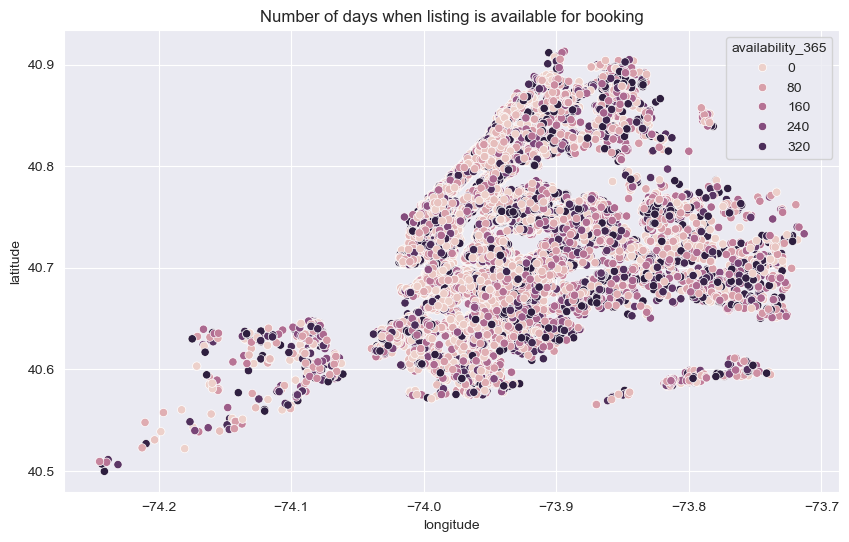

In [14]:
# Plot persebaran 'availability_365'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['availability_365']).set_title('Number of days when listing is available for booking');

Dapat terlihat bahwa di Brooklyn, jumlah hari tersedia untuk dapat dilakukan booking lebih sedikit daripada daerah lainnya. Hal ini mungkin ada kaitannya dengan lebih banyaknya private room yang disewakan di Brooklyn.

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [15]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [16]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.00,48895,"[36037506, 7661020]"
1,name,object,16,0.03,47905,"[Brooklyn Sanctuary, 1 bedroom spacious and br..."
2,host_id,int64,0,0.00,37457,"[20809866, 524575]"
3,host_name,object,21,0.04,11452,"[Thoralf, Chelsea]"
4,neighbourhood_group,object,0,0.00,5,"[Manhattan, Staten Island]"
5,neighbourhood,object,0,0.00,221,"[Cambria Heights, Lighthouse Hill]"
6,latitude,float64,0,0.00,19048,"[40.71418, 40.76267]"
7,longitude,float64,0,0.00,14718,"[-73.91245, -73.8521]"
8,room_type,object,0,0.00,3,"[Private room, Shared room]"
9,price,int64,0,0.00,674,"[4160, 3512]"


Dari info dataset di atas, terdapat data yang kosong pada beberapa fitur atau kolom. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data-data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

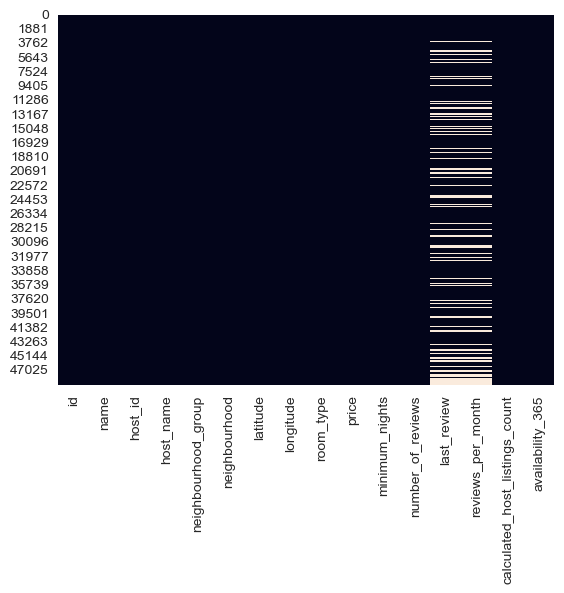

In [17]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Terdapat 4 fitur yang memiliki missing value. Fitur 'last_review' dan 'reviews_per_month' memiliki jumlah missing value yang sama, persentasenya mencapai hampir 21% dari total data. Selain itu, ternyata pola persebaran missing value-nya pun sama. Jika last_review tidak ada datanya, maka reviews_per_month pun tidak ada. Untuk fitur 'name' dan 'host_name', kita tidak perlu memikirkannya lebih lanjut karena nantinya kedua fitur ini sudah pasti akan kita drop.

Kita juga dapat mengetahui bahwa tidak ada data yang duplikat pada dataset dengan melihat jumlah data unik dari fitur id, di mana jumlah data uniknya sama dengan jumlah keseluruhan data. Oleh karena itu, dataset ini tidak memiliki data yang duplikat. Untuk memastikannya, kita bisa cek dengan menggunakan function duplicated().

In [18]:
# Cek data duplikat
df_model.duplicated().sum()

0

**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar domain knowledge, fitur 'id', 'host_id', 'name', dan 'host_name' tidak memiliki relevansi dan kepentingan untuk analisis prediktif.
- Fitur 'reviews_per_month' juga tidak diperlukan untuk membangun model prediktif harga sewa listing baru karena nilai data pada fitur ini muncul setelah listing properti sudah ada yang menyewa dan memberikan review.

In [19]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['id', 'host_id', 'name', 'host_name', 'reviews_per_month'], axis=1, inplace=True)

In [20]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.1+ MB


Sekarang kolom 'id', 'host_id', 'name', 'host_name', dan 'reviews_per_month' sudah tidak ada.


**Missing Value**

In [21]:
# Cek nilai missing value
df_model.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Hanya fitur 'last_review' yang masih memiliki missing value. Sebenarnya, fitur 'last_review' juga tidak diperlukan untuk pemodelan. Namun, dari fitur ini kita bisa melakukan penyaringan data, yang mana listing properti yang akan kita gunakan adalah yang memiliki review dalam satu tahun terakhir dari tanggal review terakhir yang terdapat di dataset. Hal ini dilakukan untuk memastikan bahwa listing yang nanti digunakan untuk training model adalah listing yang masih cukup update. 

Jadi, sebelum membuang fitur 'last_review', kita lakukan filtering terlebih dahulu berdasarkan fitur ini.

In [22]:
# Mengubah tipe data 'last_review' menjadi datetime
df_model['last_review'] = pd.to_datetime(df_model['last_review'])

In [23]:
# Mengecek tanggal terakhir pada dataset
max(df_model['last_review'])

Timestamp('2019-07-08 00:00:00')

Tanggal terakhir adalah 8 Juli 2019. Sekarang kita akan melakukan filtering data berdasarkan fitur 'last_review' ini, di mana setidaknya suatu listing mendapatkan review pada 8 Juli 2018.

In [24]:
# Filtering data berdasarkan 'last_review'
df_model = df_model[(df_model['last_review'] > '2018-07-08')]

In [25]:
# Cek kembali dataset info
df_model.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Ternyata, dengan kita melakukan filtering pada data dengan 'last_review' satu tahun terakhir, sudah tidak ada lagi missing value. Dengan kata lain, missing value pada fitur 'last_review' terdapat pada data-data listing yang sudah cukup lama (lebih dari satu tahun).

Selanjutnya, kita juga perlu mengecek apakah terdapat nilai-nilai yang dirasa tidak masuk akal pada setiap fiturnya, misal ada nilai yang kurang dari 0. Kita bisa mengeceknya melalui statistika deskriptif untuk tiap numerikal fitur. 

In [26]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
count,29129.000000,29129.000000,29129.000000,29129.000000,29129.000000,29129,29129.000000,29129.000000
mean,40.727249,-73.948591,142.021765,5.422809,36.501459,2019-04-29 09:54:39.412269568,5.924234,139.202891
min,40.506410,-74.244420,0.000000,1.000000,1.000000,2018-07-09 00:00:00,1.000000,0.000000
25%,40.687480,-73.982280,69.000000,1.000000,5.000000,2019-04-20 00:00:00,1.000000,12.000000
50%,40.720970,-73.953270,105.000000,2.000000,15.000000,2019-06-13 00:00:00,1.000000,96.000000
75%,40.762660,-73.930480,175.000000,4.000000,46.000000,2019-06-27 00:00:00,2.000000,263.000000
max,40.913060,-73.712990,8500.000000,365.000000,629.000000,2019-07-08 00:00:00,327.000000,365.000000
std,0.056177,0.050070,156.098512,11.683505,53.041822,NaN,29.654250,128.682530


Pengecualian untuk fitur 'longitude', tidak ada fitur yang memiliki nilai negatif (< 0). Akan tetapi, beberapa fitur memiliki nilai minimum sama dengan 0, yaitu 'price', 'number_of_reviews', dan 'availability_365'. 

Dari ketiga fitur tersebut, fitur 'price' dirasa tidak masuk akal kalau nilainya 0. Itu berarti sang host menyewakan propertinya secara gratis. Oleh karena itu, data yang memiliki nilai price = 0 lebih baik kita drop. Selain itu, agar bisa membangun model prediktif yang lebih baik, kita filter kembali datanya dengan hanya memilih listing yang minimal memiliki 2 reviews. Jadi, listing yang belum memiliki review dan hanya memiliki 1 review tidak akan digunakan untuk proses pemodelan.

In [27]:
# Cek harga sewa yang bernilai 0
df_model[df_model['price'] == 0]['price'].count()

7

In [28]:
# Cek listing yang memiliki review kurang dari 2
df_model[df_model['number_of_reviews'] < 2]['number_of_reviews'].count()

2563

In [29]:
# Drop data dengan nilai price = 0 & jumlah review < 2
df_model = df_model[(df_model['price'] != 0) & (df_model['number_of_reviews'] > 1)]

In [30]:
# Cek kembali dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26559 entries, 0 to 48805
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             26559 non-null  object        
 1   neighbourhood                   26559 non-null  object        
 2   latitude                        26559 non-null  float64       
 3   longitude                       26559 non-null  float64       
 4   room_type                       26559 non-null  object        
 5   price                           26559 non-null  int64         
 6   minimum_nights                  26559 non-null  int64         
 7   number_of_reviews               26559 non-null  int64         
 8   last_review                     26559 non-null  datetime64[ns]
 9   calculated_host_listings_count  26559 non-null  int64         
 10  availability_365                26559 non-null  int64         
dtypes: date

**Data Correlation**

In [31]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

ValueError: could not convert string to float: 'Brooklyn'

<Figure size 1500x1200 with 0 Axes>

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur price. Korelasi paling tinggi dimiliki oleh fitur 'longitude', di mana korelasinya adalah korelasi negatif. Ini berarti semakin ke barat lokasi suatu listing, maka harga sewanya pun semakin murah.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

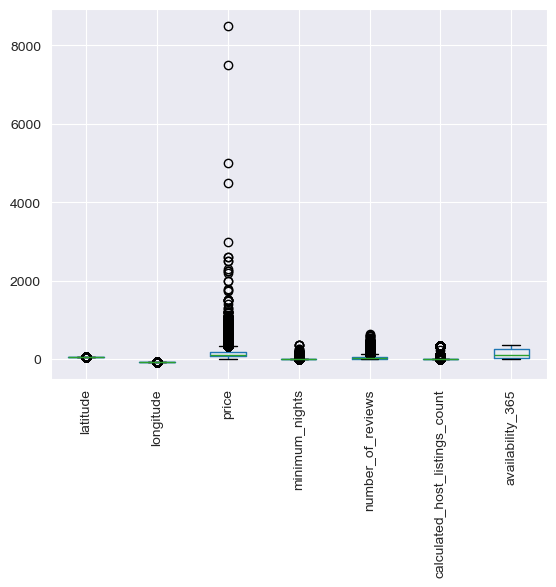

In [32]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [33]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [34]:
# Outliers pada fitur price
find_anomalies(df_model['price'])

IQR: 101.0
limit_bawah: -82.5
limit_atas: 321.5


In [35]:
# Outliers pada fitur minimum_nights
find_anomalies(df_model['minimum_nights'])

IQR: 3.0
limit_bawah: -3.5
limit_atas: 8.5


In [36]:
# Outliers pada fitur number_of_reviews
find_anomalies(df_model['number_of_reviews'])

IQR: 45.0
limit_bawah: -61.5
limit_atas: 118.5


In [37]:
# Outliers pada fitur calculated_host_listings_count
find_anomalies(df_model['calculated_host_listings_count'])

IQR: 1.0
limit_bawah: -0.5
limit_atas: 3.5


In [38]:
# Outliers pada fitur availability_365
find_anomalies(df_model['availability_365'])

IQR: 249.0
limit_bawah: -360.5
limit_atas: 635.5


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Price**

In [39]:
# Cek deskriptif statistik kolom price
df_model['price'].describe()

count    26559.000000
mean       140.270191
std        148.193300
min         10.000000
25%         69.000000
50%        104.000000
75%        170.000000
max       8500.000000
Name: price, dtype: float64

In [40]:
# Cek price > $321.5
df_model[df_model['price'] > 321.5].count()['price']

1446

Terlihat bahwa 75% data pada kolom price bernilai kurang dari USD 170, sedangkan nilai maksimalnya adalah USD 8500. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 1446 data yang nilai price-nya lebih besar dari USD 321.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki price lebih besar dari  USD 321.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

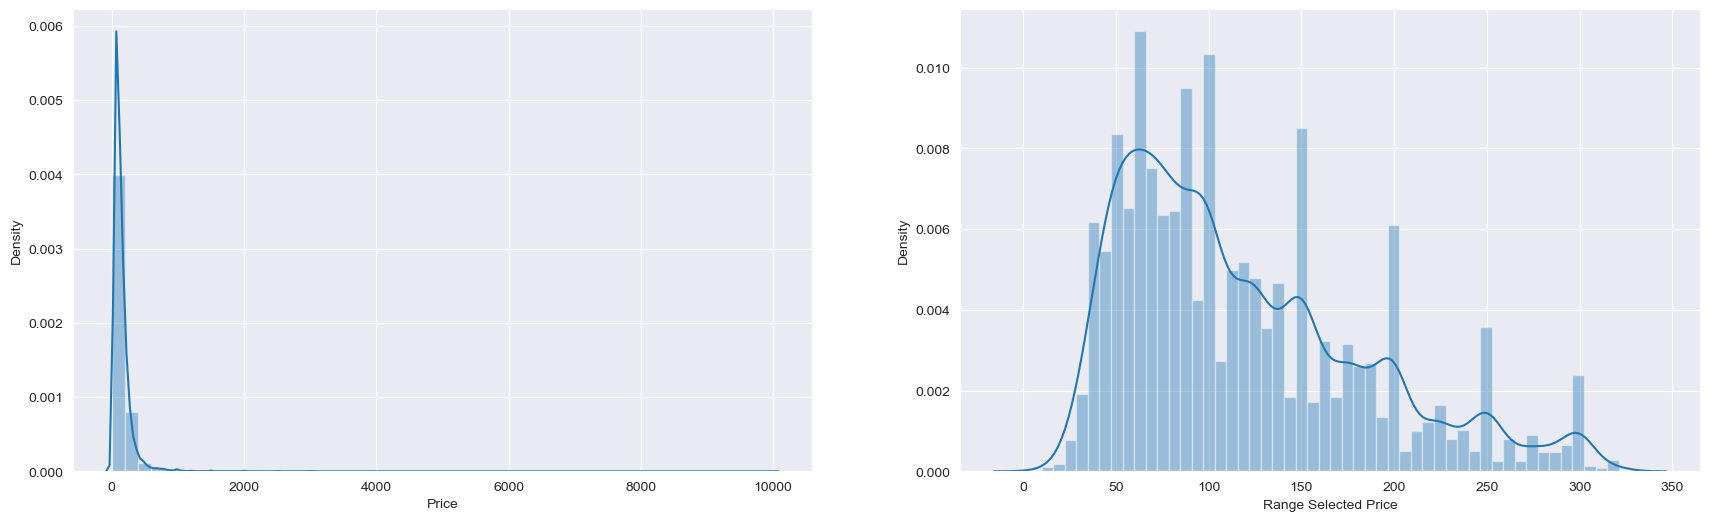

In [41]:
# Melakukan filtering pada data
df_model = df_model[(df_model['price'] <= 321.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(df_model['price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [42]:
# Cek deskriptif statistik kolom 'price' setelah filtering
df_model['price'].describe()

count    25113.000000
mean       117.946482
std         65.244142
min         10.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        321.000000
Name: price, dtype: float64

**Minimum Nights**

Meskipun batas atas berdasarkan metode IQR untuk fitur 'minimum_nights' adalah 8.5, namun ternyata jumlah data yang lebih besar dari 8.5 cukup banyak. Jika data yang lebih besar dari 8.5 ini tidak disertakan, tentu akan banyak menghilangkan informasi aktual. 

Oleh karena itu, dipilihlah cara dengan mengambil asumsi bahwa data yang digunakan adalah data dengan minimum reservasi tidak lebih dari 30 hari (asumsi 1 bulan maksimalnya 30 hari), atau dengan kata lain tidak termasuk ke dalam [long-term hosting](https://www.airbnb.com/help/article/1354/what-are-some-differences-between-longterm-hosting-and-shortterm-hosting). Pada akhirnya, data yang nilainya lebih besar dari 30 akan di-drop, sehingga nilai skewness untuk fitur ini pun akan berkurang. 

In [43]:
# Cek deskriptif statistik kolom minimum_nights
df_model['minimum_nights'].describe()

count    25113.000000
mean         5.057142
std         10.487733
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        365.000000
Name: minimum_nights, dtype: float64

In [44]:
# Cek jumlah nilai minimum nights > 30
df_model[df_model['minimum_nights'] > 30].count()['minimum_nights']

215

In [45]:
# Memilih data dengan nilai minimum nights tidak lebih dari 30
df_model = df_model[(df_model['minimum_nights'] <= 30)]

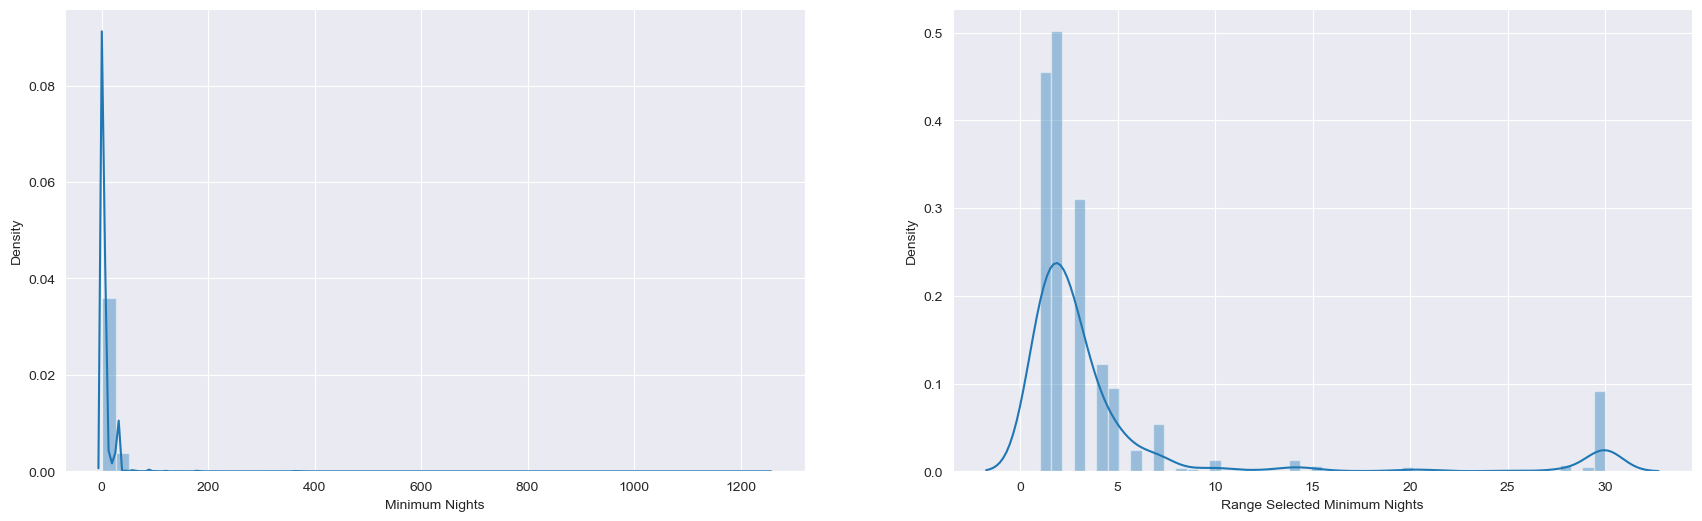

In [46]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['minimum_nights'], ax=axes[0])
sns.distplot(df_model['minimum_nights'], ax=axes[1])
axes[0].set_xlabel('Minimum Nights')
axes[1].set_xlabel('Range Selected Minimum Nights');

**Calculated Host Listings Count**

In [47]:
df_model['calculated_host_listings_count'].describe()

count    24898.000000
mean         4.933810
std         25.650943
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [48]:
# Cek jumlah host yang memiliki lebih dari 10 listing
len(df_model[df_model['calculated_host_listings_count'] > 10])

1032

Untuk fitur 'calculated_host_listings_count', nilai yang lebih besar dari 10 akan di-drop. Hal ini mempertimbangkan nilai batas atas dari metode IQR dan juga domain knowledge, yang mana nilai batas atas adalah 3.5. Namun, akan ada lebih banyak data yang terbuang jika melimitasi dengan nilai > 4. Oleh karena itu, diputuskan untuk melimitasi data dengan host yang maksimal memiliki listing sebanyak 10. Terdapat 1032 host yang memiliki lebih dari 10 listing.

In [49]:
# Menerapkan limitasi data berdasar kolom 'calculated_host_listings_count'
df_model = df_model[(df_model['calculated_host_listings_count'] <= 10)]

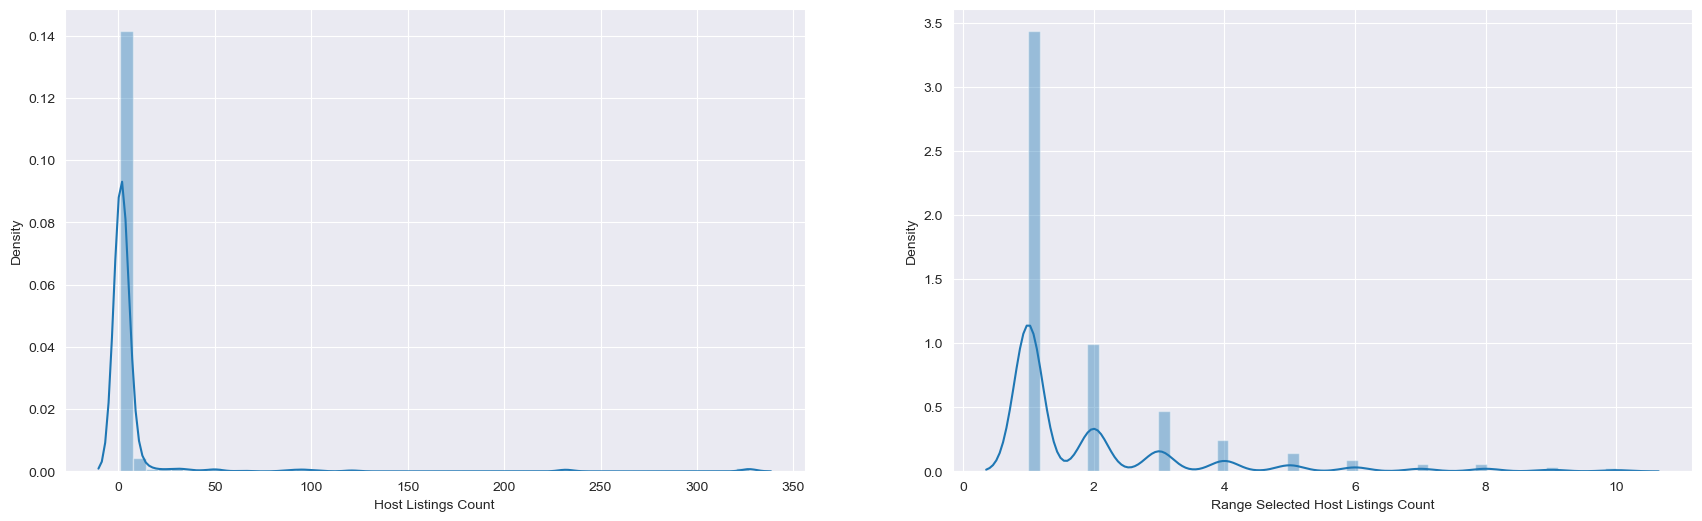

In [50]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['calculated_host_listings_count'], ax=axes[0])
sns.distplot(df_model['calculated_host_listings_count'], ax=axes[1])
axes[0].set_xlabel('Host Listings Count')
axes[1].set_xlabel('Range Selected Host Listings Count');

**Availability 365**

In [51]:
# Cek statistik deskriptif fitur 'availability_365'
df_model['availability_365'].describe()

count    23866.000000
mean       131.515252
std        125.845570
min          0.000000
25%         10.000000
50%         88.000000
75%        248.000000
max        365.000000
Name: availability_365, dtype: float64

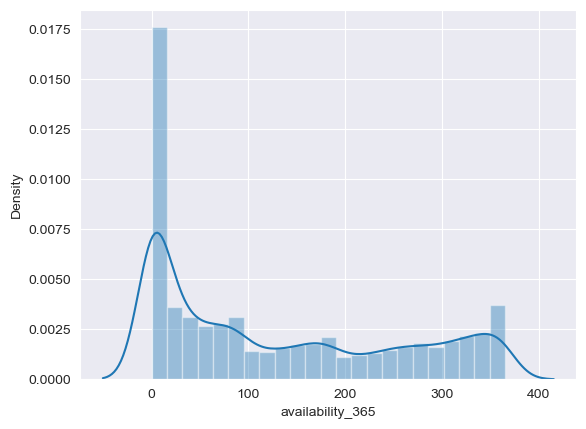

In [52]:
# Plot distribusi fitur 'availability_365'
sns.distplot(df_model['availability_365']);

In [53]:
# Cek jumlah data dengan nilai availability_365 = 0
df_model[df_model['availability_365'] == 0].count()['availability_365']

4190

Terdapat 4190 data dengan nilai availability_365 = 0. Hal ini bisa saja terjadi karena sejumlah listing tersebut sudah di-booking secara penuh selama satu tahun. Akan tetapi, fitur ini tidak relevan sebagai input untuk model yang bertujuan untuk memprediksi harga sewa listing properti baru, karena nilai pada fitur ini didapat ketika listing sudah rilis. Oleh karena itu, fitur ini tidak akan dimasukkan ke dalam pemodelan.

Selanjutnya, kita akan kembali men-drop fitur-fitur tersisa yang tidak dibutuhkan untuk pemodelan prediksi harga listing baru, di antaranya adalah 'availability_365', 'last_review', dan 'number_of_reviews'.

In [54]:
# Drop fitur 'availability_365' dan 'last_review'
df_model = df_model.drop(columns=['availability_365', 'last_review', 'number_of_reviews'], axis=1)

**Clean Dataset**

In [55]:
# Cek dataset yang sudah bersih
df_model.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1


In [56]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23866 entries, 0 to 48805
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             23866 non-null  object 
 1   neighbourhood                   23866 non-null  object 
 2   latitude                        23866 non-null  float64
 3   longitude                       23866 non-null  float64
 4   room_type                       23866 non-null  object 
 5   price                           23866 non-null  int64  
 6   minimum_nights                  23866 non-null  int64  
 7   calculated_host_listings_count  23866 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.6+ MB


Pada akhirnya, tersisa 23866 baris data yang akan digunakan untuk pemodelan. Ini berarti lebih dari 50% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **Modeling**

In [60]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [61]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['neighbourhood_group', 'room_type']),
    ('Binary', ce.BinaryEncoder(), ['neighbourhood'])
], remainder='passthrough')

**Data Splitting**

In [65]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['price'], axis=1)
y = df_model['price']
df_model

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1
...,...,...,...,...,...,...,...,...
48351,Brooklyn,Bay Ridge,40.62373,-74.02676,Entire home/apt,200,1,1
48634,Manhattan,Upper West Side,40.80281,-73.96550,Entire home/apt,110,3,1
48636,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,1
48701,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,1


**Train and Test Splitting**

In [63]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [64]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-44.70659293 -47.5163147  -46.29069868 -45.74641634 -46.43214062] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-31.58027773 -33.37097059 -32.5284976  -32.43854092 -32.71535003] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.29900748 -0.30277051 -0.30254086 -0.30157807 -0.29879601] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-44.74817413 -47.77928787 -46.88841148 -46.07306954 -46.91381031] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-31.65637639 -33.22963286 -32.96482326 -32.88493879 -33.11774828] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.

In [ ]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-46.138433,0.917807,-32.526727,0.574782,-0.300939,0.001712
1,KNN Regressor,-46.480551,1.020583,-32.770704,0.569827,-0.302792,0.002289
2,DecisionTree Regressor,-60.376801,0.712049,-42.332035,0.353641,-0.396878,0.005457
3,RandomForest Regressor,-45.024745,0.997208,-31.359950,0.491111,-0.284826,0.001625
4,XGBoost Regressor,-44.494128,1.073594,-30.963333,0.621168,-0.283140,0.002083


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [ ]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,44.164132,31.706818,0.300005
RandomForest,45.006757,32.137844,0.299552


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [ ]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['neighbourhood_group',
                                                                                'room_type']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['neighbourhood'])])),
            

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,6.452344,0.058945,0.029593,0.002049,0.9,0.059948,119,8,0.05,5,...,0.434597,1,-0.303316,-0.304478,-0.301336,-0.302013,-0.296898,-0.301608,0.002591,1
17,6.450837,0.085652,0.031896,0.002565,0.6,0.001,190,5,0.04,9,...,0.462806,2,-0.304616,-0.306826,-0.304979,-0.303674,-0.301985,-0.304416,0.001589,2
24,2.727541,0.029014,0.029194,0.001984,0.9,10.0,146,4,0.06,5,...,0.495391,3,-0.309998,-0.315365,-0.314457,-0.312110,-0.310748,-0.312536,0.002074,5
23,2.680627,0.016243,0.030092,0.002027,0.9,3.593814,153,4,0.33,9,...,0.461790,5,-0.312515,-0.315417,-0.312021,-0.311411,-0.306739,-0.311621,0.002802,4
22,2.703325,0.062366,0.031288,0.003142,0.7,0.002783,155,4,0.25,8,...,0.466259,4,-0.310646,-0.313634,-0.312782,-0.310536,-0.306312,-0.310782,0.002537,3


In [ ]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43.25345976771599
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [ ]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,43.282315,30.975281,0.290822


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [ ]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,44.164132,31.706818,0.300005


In [ ]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,43.282315,30.975281,0.290822


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 44.16, 31.70, 0.300
- RMSE, MAE & MAPE setelah tuning: 43.28, 30.97, 0.290

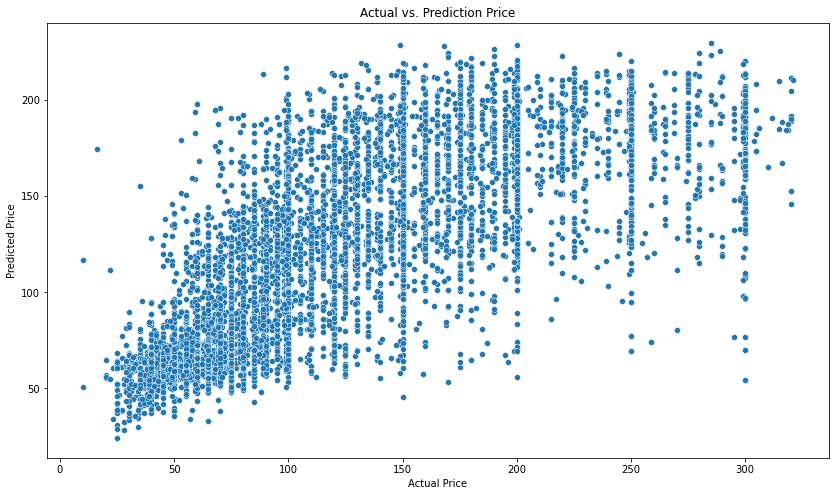

In [ ]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 29% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

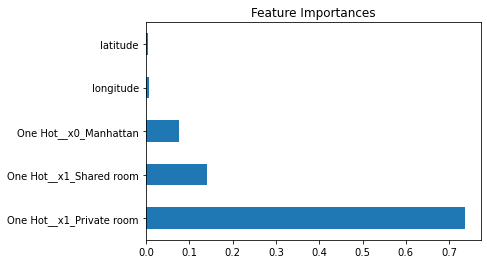

In [ ]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'room_type' dan 'neighbourhood_group' menjadi fitur yang paling berpengaruh terhadap 'price'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~29%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga listing baru di New York City pada rentang nilai seperti yang dilatih terhadap model (maksimal harga USD 321), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 29% dari harga seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek properti dan juga services, seperti jumlah kamar, luas bangunan, ada atau tidaknya free meals, handuk, dan lain-lain.

 Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah sewa listing. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  

### **Recommendations**

    Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap lakunya listing jika dibandingkan dengan host yang menentukan harga sewa listingnya sendiri.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('price'), seperti luas kamar atau jarak ke pusat kota. Selain itu, adanya penambahan data terkini untuk New York Airbnb tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update harga listing untuk listing yang sudah memiliki review. Pembuatan model dengan tujuan seperti ini dapat memanfaatkan data asli rilisan dari Airbnb (yang bukan diambil dari Kaggle) yang mungkin memiliki kolom 'review' dari customer. Jika memang ada, kita dapat melakukan sentiment analysis untuk mendapatkan insight dari review customer tersebut. 

    Dalam prosesnya, tiap review dapat di-assign ke dalam -1 (untuk sentimen negatif) dan 1 (untuk sentimen positif). Nantinya, nilai review yang didapat untuk tiap listing yang sama akan dirata-ratakan, sehingga nantinya nilai akhir untuk tiap listing tersebut dapat kita gunakan sebagai fitur pada model. Pada akhirnya, akurasi prediksi dari model pun bisa lebih baik.

****

#### **Save Model**

In [ ]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_Airbnb_XGB.sav', 'wb'))

In [ ]:
# Load model
# filename = 'Model_Airbnb_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))